In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("laptopDataNBeur.csv")

In [3]:
df

,ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515
1,1,Apple,Ultrabook,133.0,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,526.850755
2,2,HP,Notebook,156.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,336.996000
3,3,Apple,Ultrabook,154.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1487.148696
4,4,Apple,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,373.919040
1269,1299,Lenovo,2 in 1 Convertible,133.0,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,878.533920
1270,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,134.212320
1271,1301,HP,Notebook,156.0,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120


In [4]:
df=df.drop("ID",axis=1)
df=df.join(pd.get_dummies(df.Company))
df=df.drop("Company",axis=1)

In [5]:
df=df.join(pd.get_dummies(df.TypeName))
df=df.drop("TypeName",axis=1)

In [6]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").str[-1]
df["Screen Width"] = df.ScreenResolution.str.split("x").str[0].astype("int")
df["Screen Height"] = df.ScreenResolution.str.split("x").str[1].astype("int")

In [7]:
df = df.drop("ScreenResolution", axis=1)

In [8]:
df["CPU Brand"] = df.Cpu.str.split(" ").str[0]
df["CPU Frequency"] = df.Cpu.str.split(" ").str[-1].str[:-3].astype("float")
df["Ram"] = df["Ram"].str[:-2].astype("int")
df = df.drop("Cpu", axis=1)

In [9]:
df["MemoryAmount"] = df.Memory.str.split(" ").str[0]
df["MemoryType"] = df.Memory.str.split(" ").str[1]

In [10]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return (float(value[:value.find("GB")]) * 1000 *1000 *1000) /(1024*1024)
    elif "TB" in value:
        return (float(value[:value.find("TB")]) * 1000 * 1000 * 1000 *1000 )/(1024*1024*1024)


df["MemoryAmount"] = df["MemoryAmount"].apply(turn_memory_into_MB)
df = df.drop("Memory", axis=1)

In [11]:
df["GPU Brand"] = df.Gpu.str.split(" ").str[0]

In [12]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [13]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [14]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [15]:
df["Weight"] = df["Weight"].str[:-2].astype("float")

In [16]:
df = df.drop("Gpu", axis=1)
df=df.join(pd.get_dummies(df.MemoryType))
df=df.drop("MemoryType",axis=1)
df

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
0,133.0,8,1.37,785.165515,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1,133.0,8,1.34,526.850755,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
2,156.0,8,1.86,336.996000,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
3,154.0,16,1.83,1487.148696,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,133.0,8,1.37,1057.053888,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,14.0,4,1.80,373.919040,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1269,133.0,16,1.30,878.533920,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1270,14.0,2,1.50,134.212320,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
1271,156.0,6,2.19,447.765120,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


<Axes: >

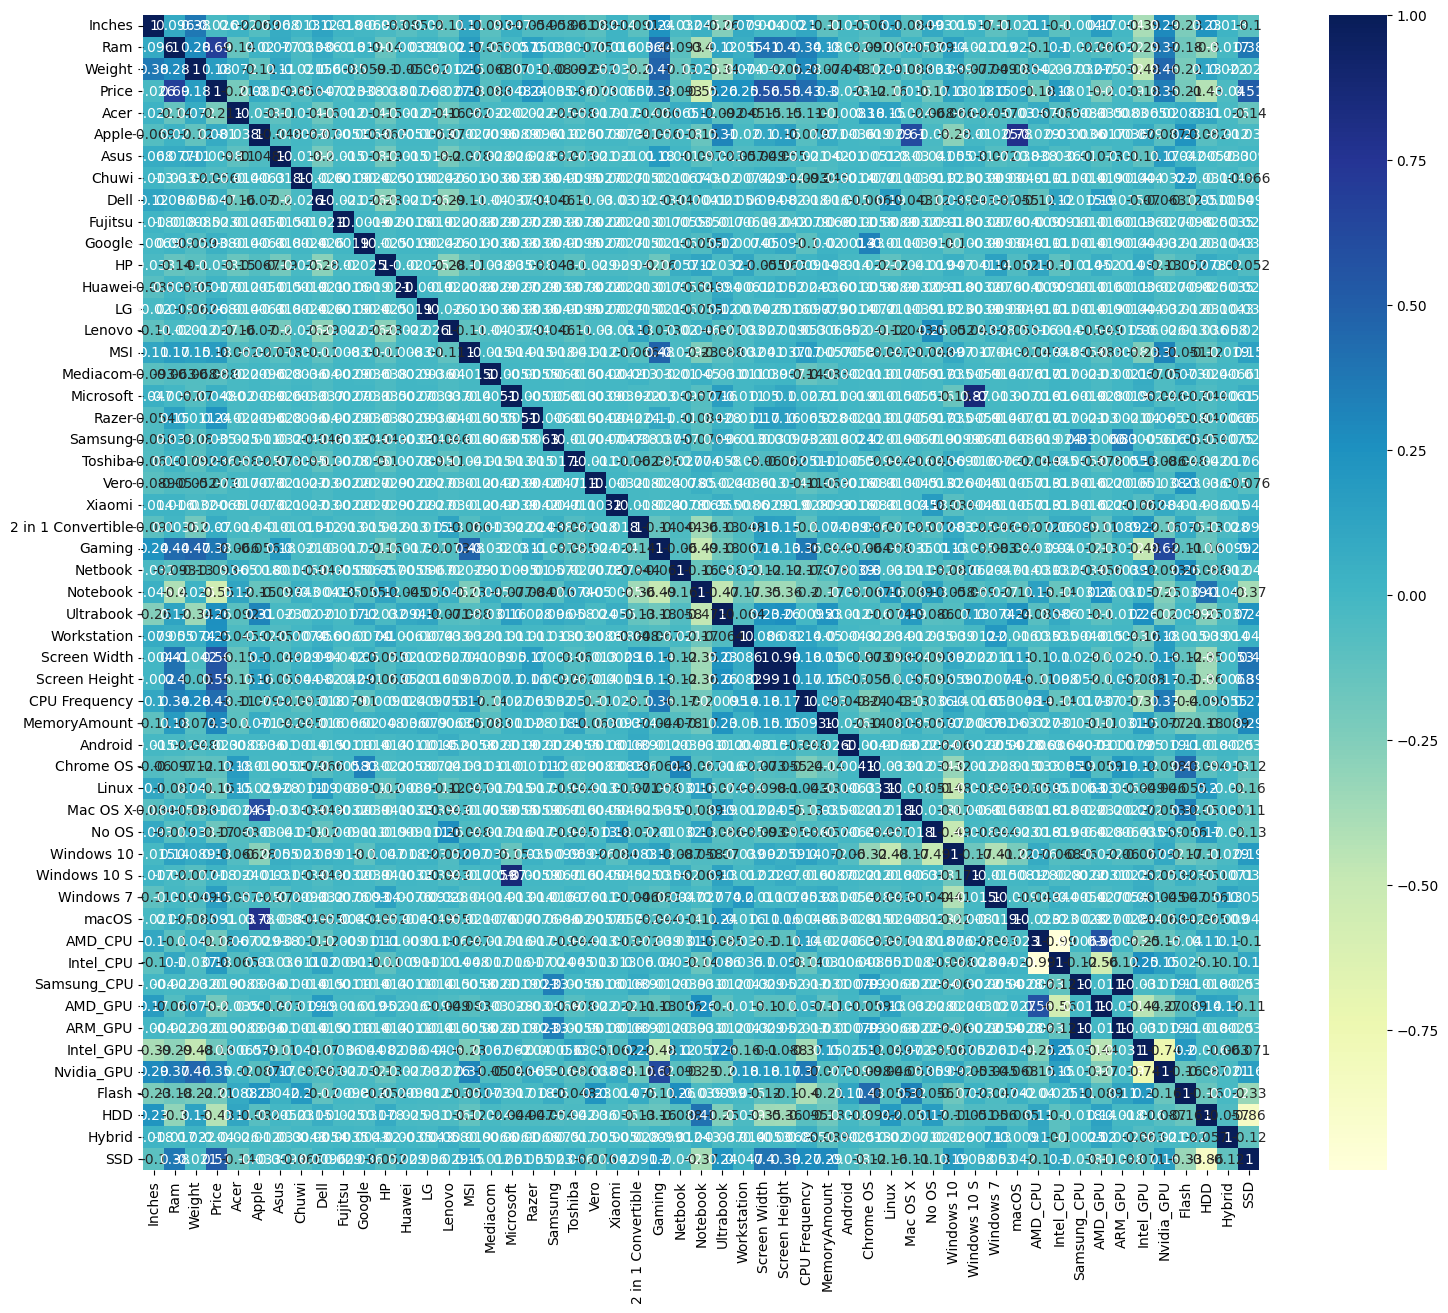

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [18]:
target_correlations = df.corr()['Price'].apply(abs).sort_values()

In [19]:
target_correlations

Xiaomi                0.000655
Asus                  0.009849
Mac OS X              0.015620
Huawei                0.016917
Windows 10 S          0.018301
ARM_GPU               0.018667
Samsung_CPU           0.018667
Fujitsu               0.022728
Android               0.023070
Inches                0.026275
Lenovo                0.027412
Samsung               0.034715
Toshiba               0.035634
HP                    0.037756
Google                0.038330
Hybrid                0.039961
Dell                  0.047438
Microsoft             0.047849
Chuwi                 0.056277
LG                    0.067567
2 in 1 Convertible    0.069839
Vero                  0.072774
Apple                 0.081157
Mediacom              0.088149
macOS                 0.090543
Netbook               0.093128
Chrome OS             0.120157
Windows 10            0.130264
Windows 7             0.153425
Linux                 0.162536
No OS                 0.171592
Weight                0.175517
MSI     

In [20]:
selected_features = target_correlations[-21:].index
selected_features = list(selected_features)
selected_features

['MSI',
 'Intel_GPU',
 'AMD_CPU',
 'Intel_CPU',
 'AMD_GPU',
 'Flash',
 'Acer',
 'Razer',
 'Workstation',
 'Ultrabook',
 'MemoryAmount',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU Frequency',
 'SSD',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price']

In [21]:
limited_df = df[selected_features]
limited_df

,MSI,Intel_GPU,AMD_CPU,Intel_CPU,AMD_GPU,Flash,Acer,Razer,Workstation,Ultrabook,...,Nvidia_GPU,Gaming,HDD,CPU Frequency,SSD,Notebook,Screen Height,Screen Width,Ram,Price
0,False,True,False,True,False,False,False,False,False,True,...,False,False,False,2.3,True,False,1600,2560,8,785.165515
1,False,True,False,True,False,True,False,False,False,True,...,False,False,False,1.8,False,False,900,1440,8,526.850755
2,False,True,False,True,False,False,False,False,False,False,...,False,False,False,2.5,True,True,1080,1920,8,336.996000
3,False,False,False,True,True,False,False,False,False,True,...,False,False,False,2.7,True,False,1800,2880,16,1487.148696
4,False,True,False,True,False,False,False,False,False,True,...,False,False,False,3.1,True,False,1600,2560,8,1057.053888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,False,True,False,True,False,False,False,False,False,False,...,False,False,False,2.5,True,False,1080,1920,4,373.919040
1269,False,True,False,True,False,False,False,False,False,False,...,False,False,False,2.5,True,False,1800,3200,16,878.533920
1270,False,True,False,True,False,True,False,False,False,False,...,False,False,False,1.6,False,True,768,1366,2,134.212320
1271,False,False,False,True,True,False,False,False,False,False,...,False,False,True,2.5,False,True,768,1366,6,447.765120


<Axes: >

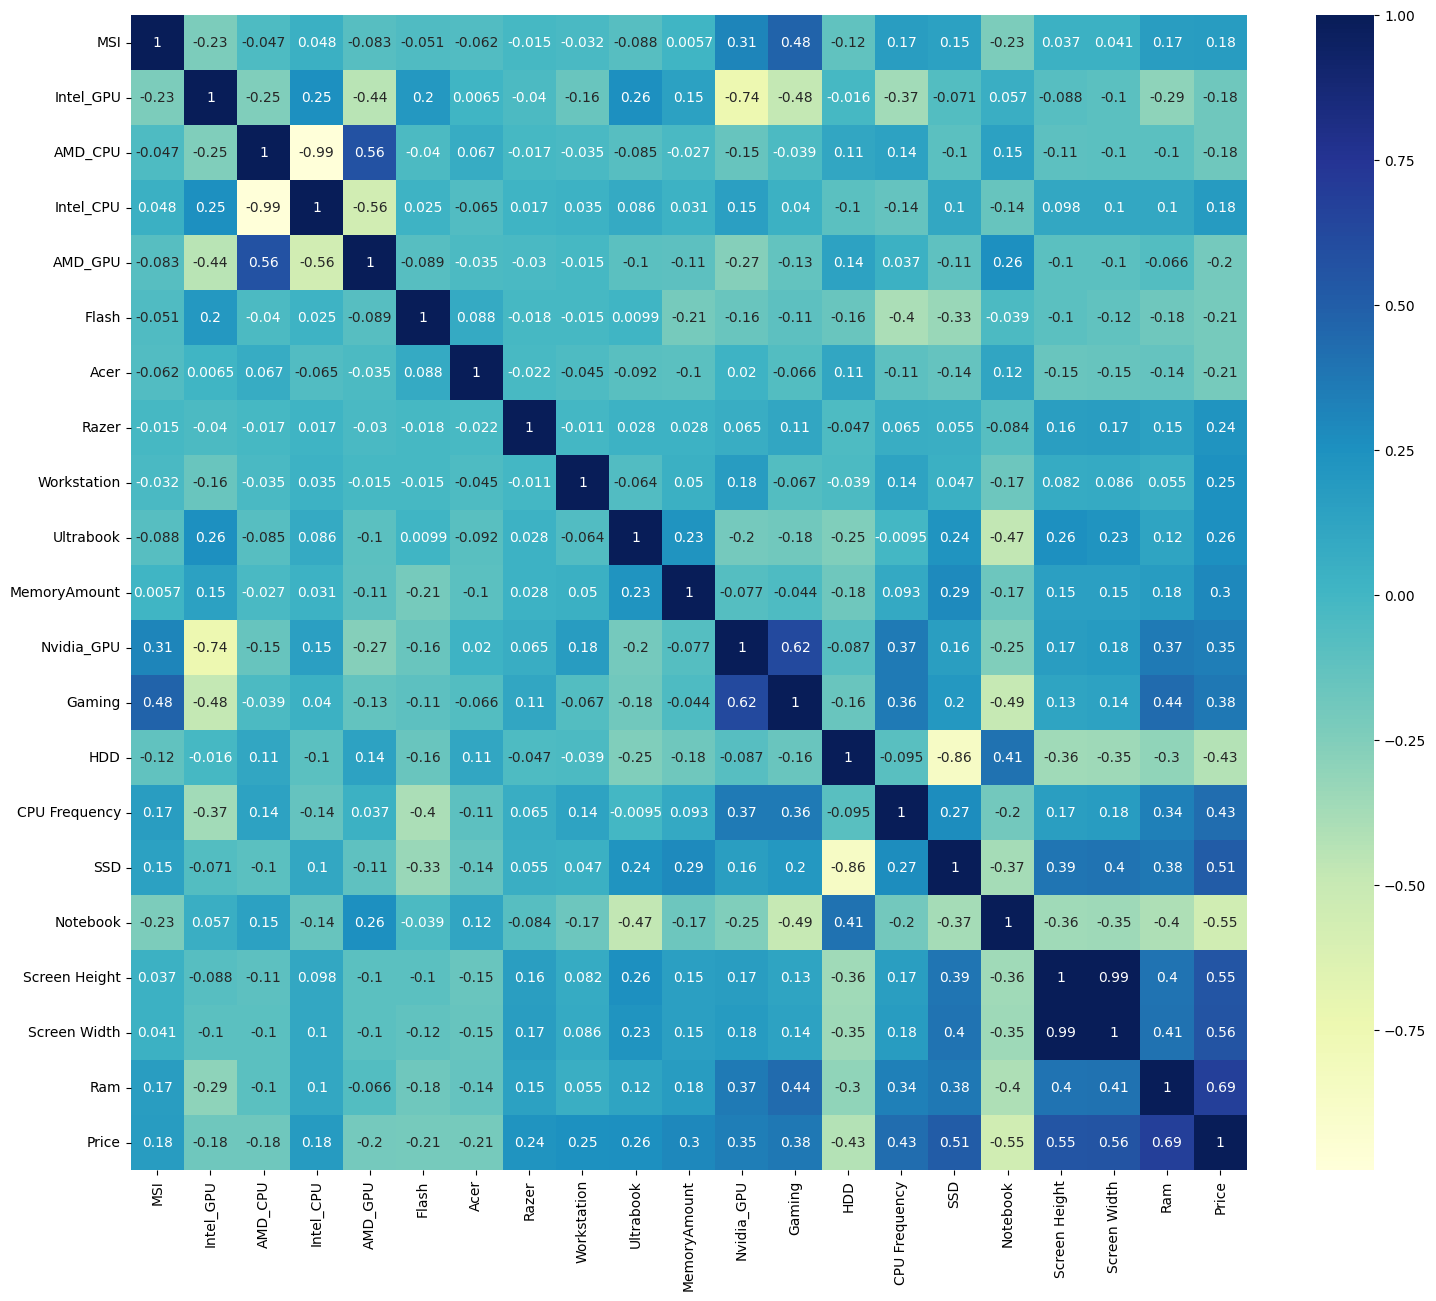

In [22]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price", axis=1), limited_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [25]:
forest.score(X_test_scaled, y_test)

0.721353401044467

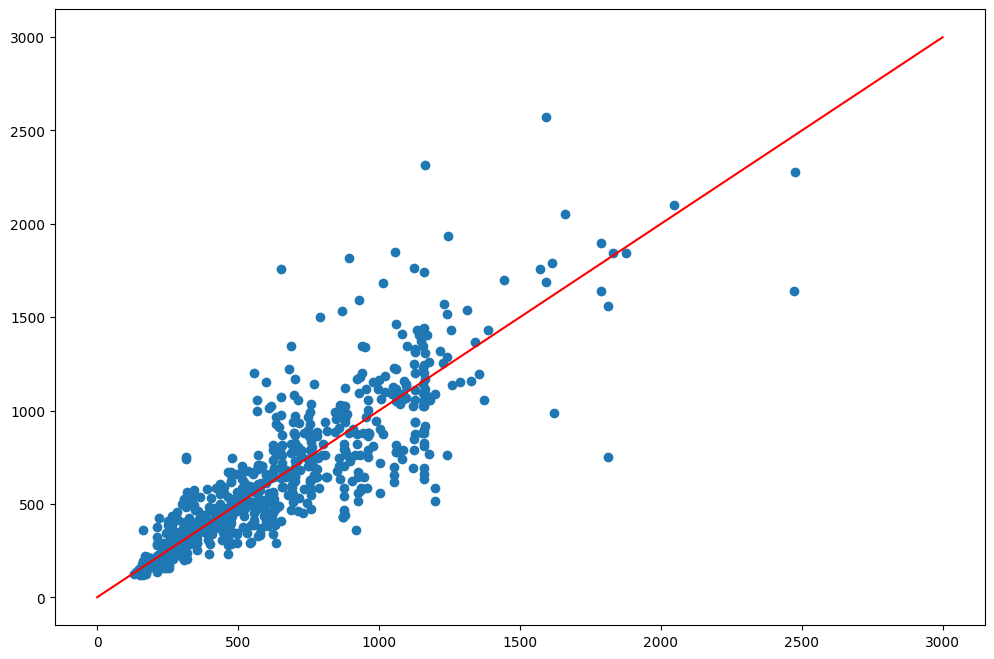

In [26]:
y_pred = forest.predict(X_test_scaled)
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 3000), range(0, 3000), c="red")

In [27]:
X_new_scaled = scaler.transform([X_test.iloc[8]])
forest.predict(X_new_scaled)

C:\Users\vteav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([909.02058244])

In [28]:
y_test.iloc[8]

901.0335312

In [29]:
X_test.iloc[8]

MSI                   False
Intel_GPU             False
AMD_CPU               False
Intel_CPU              True
AMD_GPU               False
Flash                 False
Acer                  False
Razer                 False
Workstation           False
Ultrabook             False
MemoryAmount     244140.625
Nvidia_GPU             True
Gaming                False
HDD                   False
CPU Frequency           2.8
SSD                    True
Notebook               True
Screen Height          1080
Screen Width           1920
Ram                      16
Name: 570, dtype: object

In [31]:
arr = ([[False,False,False,True,False,False,True,False,False,False,931.322575,True,False,True,1.8,False,True,1080,1920,16]])
forest.predict(scaler.transform(arr))

C:\Users\vteav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([900.43027906])